## 1-1. Python 필요 패키지 인스톨 부분

In [2]:
# matplotlib 패키지 없을 시 실행 할것 
!pip install matplotlib

In [3]:
# 지도시각화 패키지 인스톨
!pip install folium

## 1-2. Python 필수 패키지 import

In [5]:
#1. Import 패키지 선언
#<필수패키지 선언>
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
#<시각화 그래프 이미지 개선 시 사용>
import matplotlib.pyplot as plt
#<부가패키지 선언>
import folium
import json

In [6]:
#1. 한글폰트 및 이미지처리 패키지 선언
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

## 2-1. DataFrame 사용변수 정의

#표
데이터내역|DataFrame 공통변수 원본|DataFrame 공통변수 복사본
-|-|-
세종특별자치시_신장 체중 등록 내역_20231231|base_hw|df_hw
세종특별자치시_인바디 측정 내역_20231231|base_inbody|df_inbody
세종특별자치시_스트레스 측정 내역_20231231|base_stress|df_stress
세종특별자치시_혈압 측정 내역_20231231|base_blood|df_blood
국민건강보험공단_건강검진정보_20231231|base_health|df_health
2024년_7월_말_기준_인구현황(세종)|base_population|df_population
병원정보서비스 2021.12 |base_hospital|df_hospital
약국정보서비스 2021.12|base_pharmacy|df_pharmacy
우편번호|base_zip|df_zip
통합측정자료(공통)|base_check|df_check

참고) 통합측정자료는 추후 생성되며 별도 파일이 있는 것은 아님

## 2-2. 분석 데이타셋 파일 로드 부분 

In [10]:
#2. CVS파일을 로드하여 DataFrame생성 
#2-1-3 혈압 측정 내역 파일 로드
base_blood = pd.read_csv('data/세종특별자치시_혈압 측정 내역_20231231.csv', encoding='cp949')
df_blood = base_blood.copy()
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53778 entries, 0 to 53777
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사용자 고유번호  53778 non-null  object 
 1   측정일자      53778 non-null  object 
 2   측정시간      53778 non-null  object 
 3   성별        53778 non-null  object 
 4   사용자 출생년도  53778 non-null  int64  
 5   행정동명      53778 non-null  object 
 6   수축 혈압     53778 non-null  int64  
 7   이완 혈압     53778 non-null  int64  
 8   맥박        19736 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


In [11]:
df_blood.shape

(53778, 9)

In [12]:
df_blood.head(5)

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:17,M,1994,나성동,128,78,92.0
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:10,F,1983,종촌동,101,55,68.0
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:19,F,1981,종촌동,117,83,86.0
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:48,M,1980,한솔동,157,96,65.0
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:00,M,1952,한솔동,139,68,55.0


In [13]:
# 컬럼 결측치 확인
nan_count=df_blood.isna().sum()
print(nan_count)

사용자 고유번호        0
측정일자            0
측정시간            0
성별              0
사용자 출생년도        0
행정동명            0
수축 혈압           0
이완 혈압           0
맥박          34042
dtype: int64


In [14]:
df_blood.describe()

,사용자 출생년도,수축 혈압,이완 혈압,맥박
count,53778.000000,53778.000000,53778.000000,19736.000000
mean,1975.921511,118.454480,74.770222,81.584009
std,10.277670,11.311433,10.152116,13.672737
min,1944.000000,61.000000,6.000000,34.000000
25%,1970.000000,113.000000,69.000000,72.000000
50%,1977.000000,120.000000,79.000000,80.000000
75%,1982.000000,122.000000,80.000000,90.000000
max,2015.000000,244.000000,167.000000,187.000000


In [15]:
# 측정일자 데이터 타입 변경
df_blood = df_blood.copy()
df_blood['측정일자'] = pd.to_datetime(df_blood['측정일자'])
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53778 entries, 0 to 53777
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  53778 non-null  object        
 1   측정일자      53778 non-null  datetime64[ns]
 2   측정시간      53778 non-null  object        
 3   성별        53778 non-null  object        
 4   사용자 출생년도  53778 non-null  int64         
 5   행정동명      53778 non-null  object        
 6   수축 혈압     53778 non-null  int64         
 7   이완 혈압     53778 non-null  int64         
 8   맥박        19736 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.7+ MB


In [16]:
# 데이터 전처리를 위한 측정연도 컬럼 추가
df_blood['측정연도'] = df_blood['측정일자'].dt.year
df_blood.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박,측정연도
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:17,M,1994,나성동,128,78,92.0,2021
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:10,F,1983,종촌동,101,55,68.0,2021
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:19,F,1981,종촌동,117,83,86.0,2021
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:48,M,1980,한솔동,157,96,65.0,2021
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:00,M,1952,한솔동,139,68,55.0,2021


In [17]:
# 통계적 유의미한 연도 확인
df_blood['측정연도'].value_counts()

측정연도
2023    47410
2022     5394
2021      967
2013        6
2024        1
Name: count, dtype: int64

In [18]:
# 2021~2023년도 데이터로 구성
df_blood=df_blood.query('측정연도 >= 2021')
df_blood=df_blood.query('측정연도 <  2024')
df_blood['측정연도'].value_counts()

측정연도
2023    47410
2022     5394
2021      967
Name: count, dtype: int64

In [19]:
# 분석 용이성을 위해 나이 컬럼 생성
df_blood['나이'] = 2023 - df_blood['사용자 출생년도'].astype(int)

# 나이 컬럼 확인
print(df_blood[['사용자 출생년도', '나이']].head())


   사용자 출생년도  나이
0      1994  29
1      1983  40
2      1981  42
3      1980  43
4      1952  71


In [20]:
df_blood.head(1)

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박,측정연도,나이
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:17,M,1994,나성동,128,78,92.0,2021,29


In [21]:
# 동별 세종똑똑 이용자 수 확인
dong_count = df_blood['행정동명'].value_counts().reset_index()
dong_count.columns = ['행정동명', '인원수']
dong_count

,행정동명,인원수
0,새롬동,7550
1,한솔동,6384
2,아름동,5810
3,다정동,5440
4,고운동,4762
5,도담동,3689
6,소담동,3430
7,나성동,2584
8,보람동,2503
9,대평동,2154


In [22]:
# 통계적 유의미를 고려 동별 사용인원 300건 이상 추출
dong_count = dong_count.query('인원수 >= 300')
dong_count

,행정동명,인원수
0,새롬동,7550
1,한솔동,6384
2,아름동,5810
3,다정동,5440
4,고운동,4762
5,도담동,3689
6,소담동,3430
7,나성동,2584
8,보람동,2503
9,대평동,2154


### IQR을 이용한 이상치 정의와 제거 그리고 께끗한 데이터 확인

In [25]:
# IQR을 이용한 혈압 이상치 제거
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name] >= lower) & (df[column_name] <= upper)]
    return filtered_df

# 수축기 혈압과 이완기 혈압의 이상치 제거
df_blood_cleaned = remove_outliers(df_blood, '수축 혈압')
df_blood_cleaned = remove_outliers(df_blood_cleaned, '이완 혈압')

# 이상치 제거 후 깨끗한 데이터 확인
df_blood_cleaned.head()


,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박,측정연도,나이
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:17,M,1994,나성동,128,78,92.0,2021,29
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:10,F,1983,종촌동,101,55,68.0,2021,40
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:19,F,1981,종촌동,117,83,86.0,2021,42
5,CAD72451510337B6E0535F00A8C02A56,2021-09-01,21:06,M,1952,한솔동,135,68,62.0,2021,71
6,CAD9C1C2704714CBE0535F00A8C0DEC1,2021-08-31,20:01,M,1978,한솔동,120,80,NaN,2021,45


#### IQR을 이용해서 제거한 이상치로만 만든 데이터셋을 저장함
##### 수축기 혈압 이상치와 이완기 혈압 이상치를 concat으로 합성함

In [27]:
# IQR을 이용한 혈압 이상치 제거 및 이상치 추출 함수
def extract_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_df = df[(df[column_name] < lower) | (df[column_name] > upper)]
    return outliers_df

# 수축기 혈압과 이완기 혈압의 이상치 추출
outliers_systolic = extract_outliers(df_blood, '수축 혈압')
outliers_diastolic = extract_outliers(df_blood, '이완 혈압')

# 두 개의 이상치 DataFrame을 합쳐서 중복되지 않도록 생성
outliers_combined = pd.concat([outliers_systolic, outliers_diastolic]).drop_duplicates()

# 결과 확인
print(outliers_combined)


                               사용자 고유번호       측정일자   측정시간 성별  사용자 출생년도 행정동명  \
3      CAD71E638BAC342BE0535F00A8C05272 2021-08-31  16:48  M      1980  한솔동   
4      CAD72451510337B6E0535F00A8C02A56 2021-08-31  17:00  M      1952  한솔동   
8      CAEEA89380A90716E0535F00A8C0F342 2021-09-01  20:58  F      1957  한솔동   
9      CAFCD67A8E9F55EAE0535F00A8C04C8B 2021-09-02  14:19  F      1990  고운동   
11     CA4C04225E405C30E0535F00A8C03ECD 2021-09-02  18:44  F      1995  다정동   
...                                 ...        ...    ... ..       ...  ...   
53054  EC65AE60B3E49557E0535F00A8C0A54A 2023-12-28  11:57  M      1979  고운동   
53197  FFA24CA844D539EFE0535F00A8C01BB6 2023-12-29  00:00  M      1952  도담동   
53425  F57EF67EA7B4C24EE0535F00A8C0BAFE 2023-12-30  07:53  M      1983  보람동   
53525  EC65AE60B3E49557E0535F00A8C0A54A 2023-12-30  17:22  M      1979  고운동   
53727  EC65AE60B3E49557E0535F00A8C0A54A 2023-12-31  19:16  M      1979  고운동   

       수축 혈압  이완 혈압    맥박  측정연도  나이  
3        157 

In [28]:
# 이상치 데이터를 CSV 파일로 저장
outliers_combined.to_csv('data/이상치_데이터.csv', index=False)
outliers_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7004 entries, 3 to 53727
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   사용자 고유번호  7004 non-null   object        
 1   측정일자      7004 non-null   datetime64[ns]
 2   측정시간      7004 non-null   object        
 3   성별        7004 non-null   object        
 4   사용자 출생년도  7004 non-null   int64         
 5   행정동명      7004 non-null   object        
 6   수축 혈압     7004 non-null   int64         
 7   이완 혈압     7004 non-null   int64         
 8   맥박        5226 non-null   float64       
 9   측정연도      7004 non-null   int32         
 10  나이        7004 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(4)
memory usage: 601.9+ KB


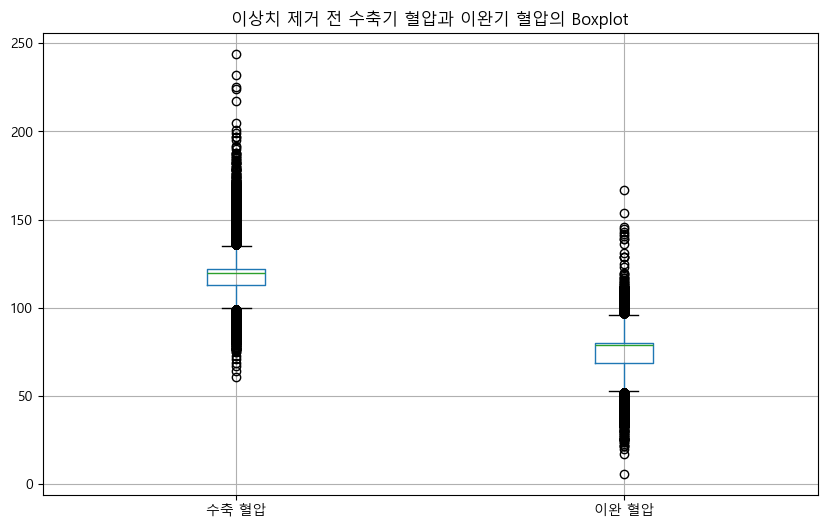

In [29]:
# 혈압 이상치 제거 전 수축기  혈압과 이완기 혈압 Boxplot 그리기
plt.figure(figsize=(10, 6))
df_blood[['수축 혈압', '이완 혈압']].boxplot()
plt.title('이상치 제거 전 수축기 혈압과 이완기 혈압의 Boxplot')
plt.show()


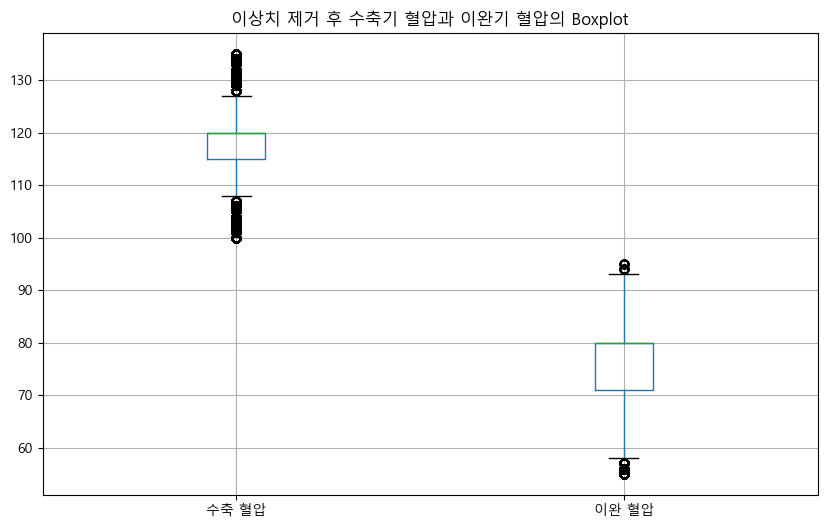

In [30]:
# 혈압 이상치 제거 후 박스플롯
plt.figure(figsize=(10, 6))
df_blood_cleaned[['수축 혈압', '이완 혈압']].boxplot()
plt.title('이상치 제거 후 수축기 혈압과 이완기 혈압의 Boxplot')
plt.show()

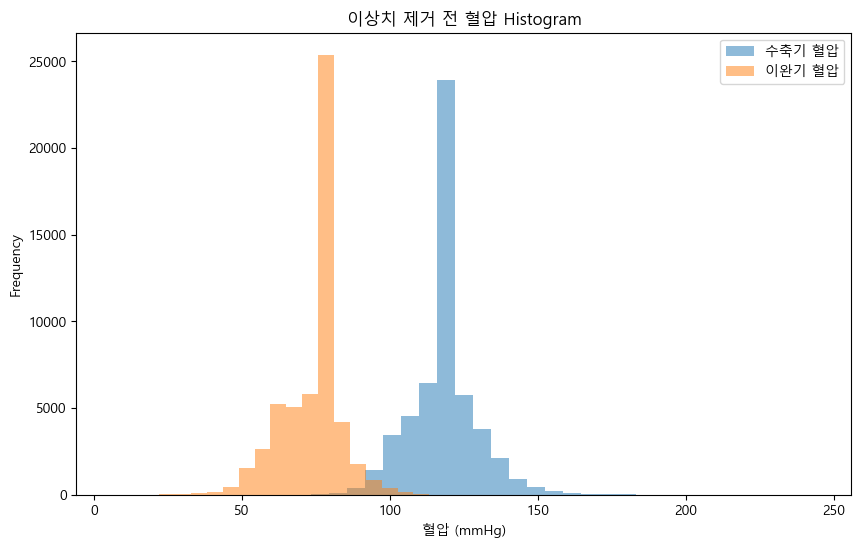

In [31]:
# 혈압 이상치 제거 전 히스토그램
plt.figure(figsize=(10, 6))
df_blood['수축 혈압'].plot.hist(bins=30, alpha=0.5, label='수축기 혈압')
df_blood['이완 혈압'].plot.hist(bins=30, alpha=0.5, label='이완기 혈압')
plt.legend()
plt.title('이상치 제거 전 혈압 Histogram')
plt.xlabel('혈압 (mmHg)')
plt.show()



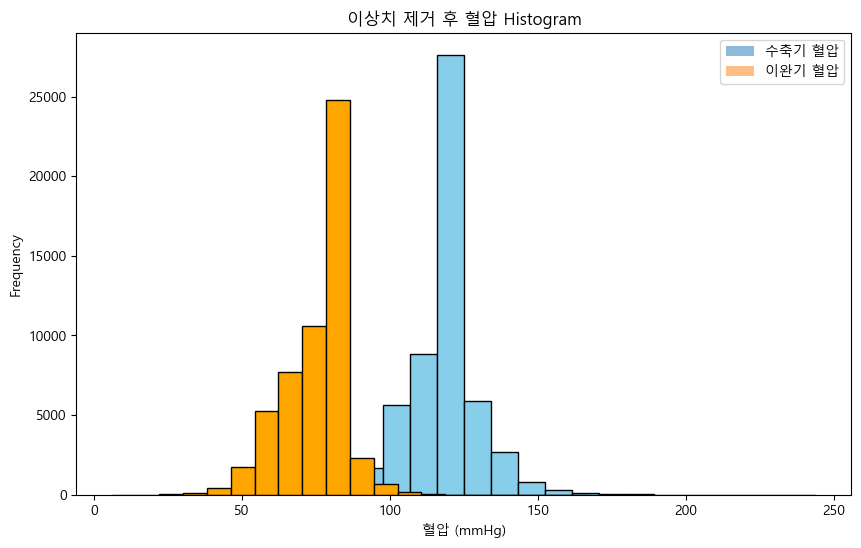

In [32]:
# 혈압 이상치 제거 후 히스토그램
plt.figure(figsize=(10, 6))
df_blood_cleaned['수축 혈압'].plot.hist(bins=30, alpha=0.5, label='수축기 혈압')
df_blood_cleaned['이완 혈압'].plot.hist(bins=30, alpha=0.5, label='이완기 혈압')
plt.legend()
plt.hist(df_blood['수축 혈압'], bins=20, color='skyblue', edgecolor='black')  # 히스토그램 색상과 테두리 설정
plt.hist(df_blood['이완 혈압'], bins=20, color='orange', edgecolor='black')
plt.title('이상치 제거 후 혈압 Histogram')
plt.xlabel('혈압 (mmHg)')
plt.show()

In [33]:
# 혈압 이상치 제거 전 Value Counts와 Bar Plot
bp_counts = df_blood['수축 혈압'].value_counts().sort_index()
bp_counts

수축 혈압
61     1
64     1
67     1
69     1
71     1
      ..
217    1
224    1
225    1
232    1
244    1
Name: count, Length: 133, dtype: int64

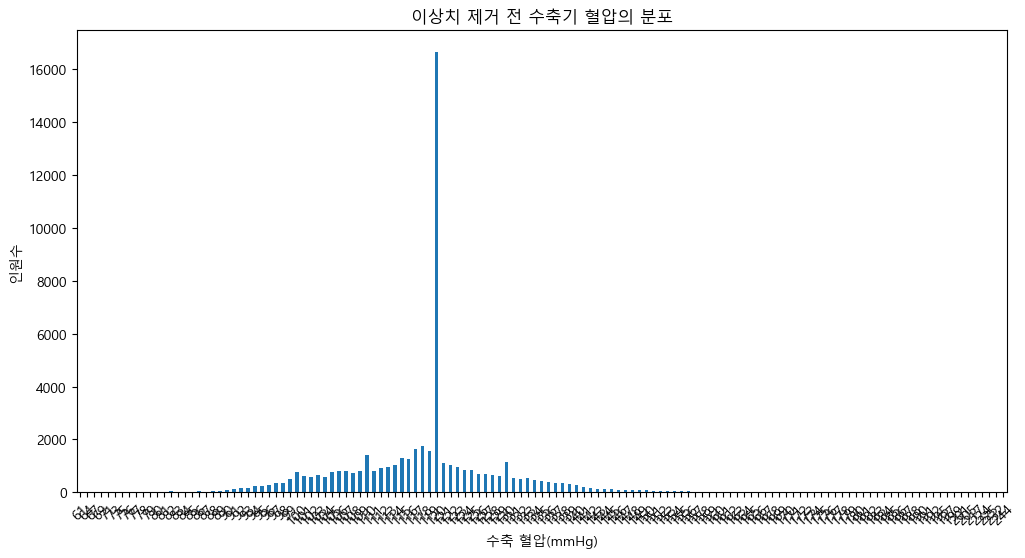

In [34]:
# 혈압 이상치 제거 전 value_counts를 이용한 Bar Plot 그리기
plt.figure(figsize=(12, 6))
bp_counts.plot.bar()
plt.title('이상치 제거 전 수축기 혈압의 분포')
plt.xlabel('수축 혈압(mmHg)')
plt.ylabel('인원수')

# x축 레이블 회전
plt.xticks(rotation=45)  # 45도 회전

plt.show()


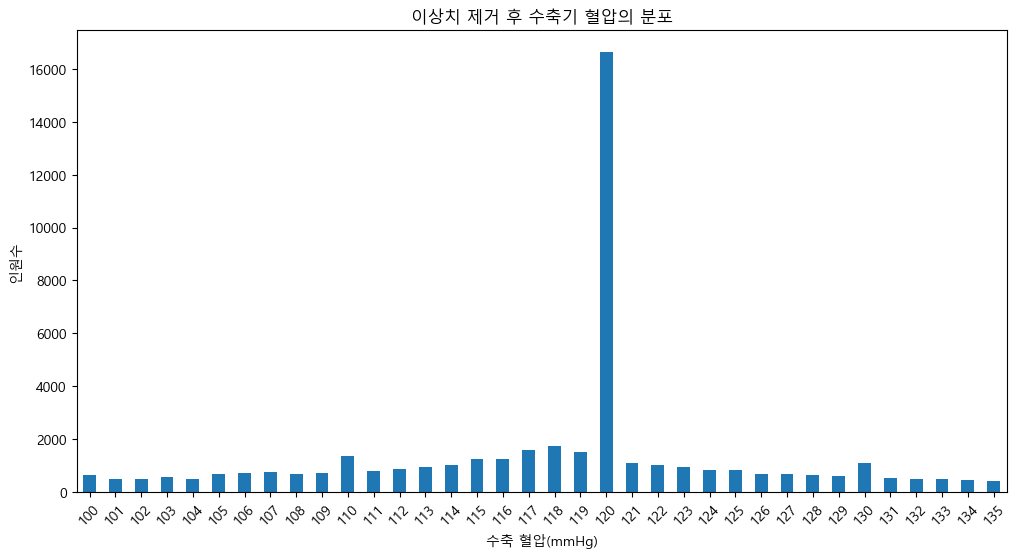

In [35]:
# 혈압 이상치 제거 후 Value Counts와 Bar Plot
bp_counts = df_blood_cleaned['수축 혈압'].value_counts().sort_index()

# Bar Plot 그리기
plt.figure(figsize=(12, 6))
bp_counts.plot.bar()
plt.title('이상치 제거 후 수축기 혈압의 분포')
plt.xlabel('수축 혈압(mmHg)')
plt.ylabel('인원수')

# x축 레이블 회전
plt.xticks(rotation=45)

plt.show()


In [36]:
df_blood.head()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박,측정연도,나이
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:17,M,1994,나성동,128,78,92.0,2021,29
1,CAD4E5E5AE8D7CACE0535F00A8C075E0,2021-08-31,14:10,F,1983,종촌동,101,55,68.0,2021,40
2,CAD50BA68DA78C38E0535F00A8C01524,2021-08-31,14:19,F,1981,종촌동,117,83,86.0,2021,42
3,CAD71E638BAC342BE0535F00A8C05272,2021-08-31,16:48,M,1980,한솔동,157,96,65.0,2021,43
4,CAD72451510337B6E0535F00A8C02A56,2021-08-31,17:00,M,1952,한솔동,139,68,55.0,2021,71


In [37]:
df_blood.tail()

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박,측정연도,나이
53773,CF28FDE31F340DF7E0535F00A8C0BFE5,2023-12-31,23:39,M,1979,새롬동,120,80,NaN,2023,44
53774,D97915F0A035D41DE0535F00A8C06243,2023-12-31,23:42,F,1982,다정동,120,80,NaN,2023,41
53775,ED2C36A4C579AADFE0535F00A8C071AE,2023-12-31,23:49,F,1976,새롬동,119,78,NaN,2023,47
53776,EC60BDA0AB32BDE8E0535F00A8C0CB28,2023-12-31,23:50,F,1982,소담동,117,73,NaN,2023,41
53777,ED47D5D202D28AB6E0535F00A8C0CE6C,2023-12-31,23:52,M,1974,새롬동,150,101,NaN,2023,49


In [38]:
# 혈압 연령대별 평균 확인
age_group = df_blood.groupby('나이')[['수축 혈압', '이완 혈압']].mean()
print(age_group)


         수축 혈압      이완 혈압
나이                       
8   113.181818  74.636364
11  109.041667  75.020833
12  112.400000  68.400000
13  109.400000  66.000000
14  113.625000  69.750000
..         ...        ...
73  125.833333  76.000000
74  120.250000  67.666667
75  126.500000  54.750000
76  121.500000  64.000000
79   98.777778  54.888889

[68 rows x 2 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_4352\2233813092.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = df_blood.groupby('나이 구간')[['수축 혈압', '이완 혈압']].mean()


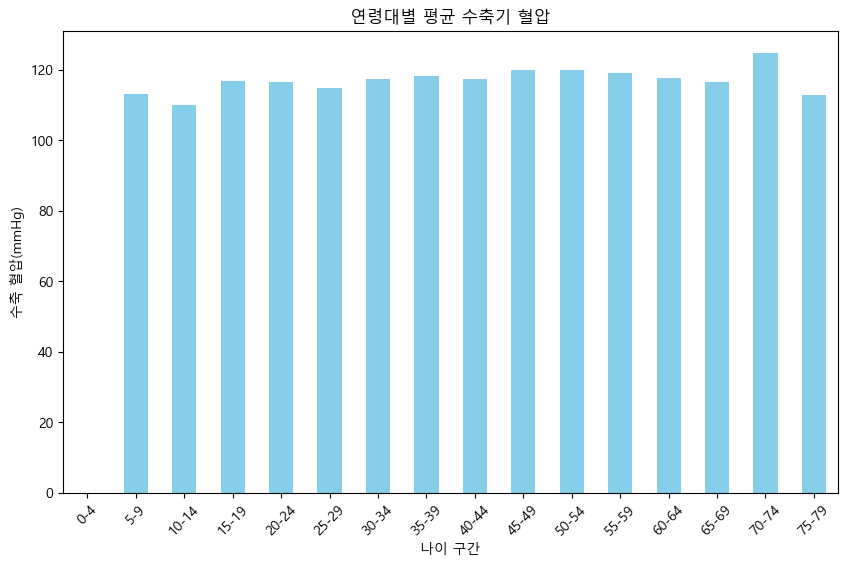

In [39]:
# 나이를 5살 간격으로 나누는 구간 설정
bins = range(0, df_blood['나이'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df_blood['나이 구간'] = pd.cut(df_blood['나이'], bins=bins, labels=labels, right=False)
age_group = df_blood.groupby('나이 구간')[['수축 혈압', '이완 혈압']].mean()

# 연령대별 수축기 혈압의 평균 시각화
plt.figure(figsize=(10, 6))
age_group['수축 혈압'].plot(kind='bar', color='skyblue')
plt.title('연령대별 평균 수축기 혈압')
plt.xlabel('나이 구간')
plt.ylabel('수축 혈압(mmHg)')
plt.xticks(rotation=45)
plt.show()


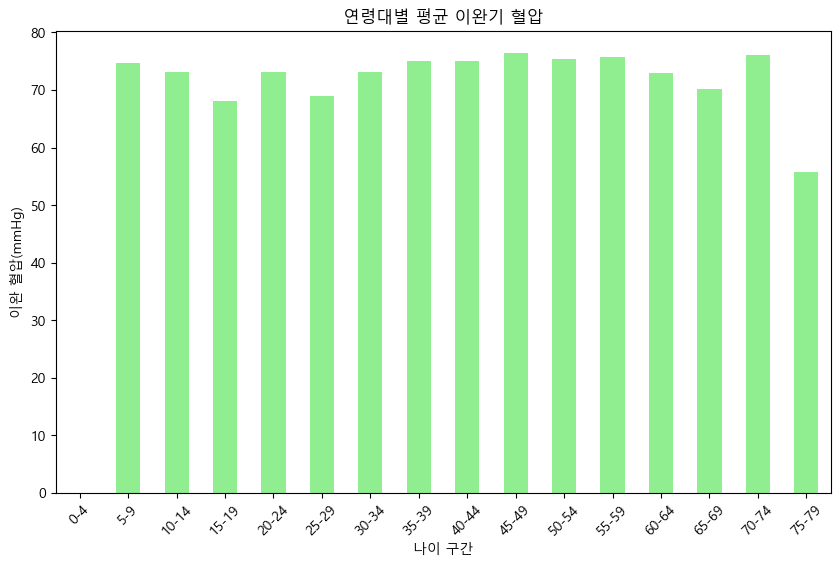

In [40]:
# 연령대별 이완기 혈압의 평균 시각화
plt.figure(figsize=(10, 6))
age_group['이완 혈압'].plot(kind='bar', color='lightgreen')
plt.title('연령대별 평균 이완기 혈압')
plt.xlabel('나이 구간')
plt.ylabel('이완 혈압(mmHg)')
plt.xticks(rotation=45)
plt.show()

In [41]:
df_blood.head(1)

,사용자 고유번호,측정일자,측정시간,성별,사용자 출생년도,행정동명,수축 혈압,이완 혈압,맥박,측정연도,나이,나이 구간
0,CA5E614540CE0769E0535F00A8C08588,2021-08-30,14:17,M,1994,나성동,128,78,92.0,2021,29,25-29


           수축 혈압      이완 혈압
행정동명                       
고운동   116.737715  75.388702
금남면   113.722222  68.166667
나성동   121.869969  77.659830
다정동   119.010294  76.306066
대평동   121.052461  77.566388
도담동   119.772025  74.207915
반곡동   120.440465  75.137948
보람동   118.905713  75.115861
부강면   114.250000  67.800000
새롬동   115.424503  72.379735
소담동   120.887755  78.537609
아름동   117.614114  74.423580
어진동   125.354125  80.671026
연기면   104.175503  58.592322
연동면   134.571429  84.428571
연서면   121.958333  73.583333
장군면   126.301653  76.888430
전동면   138.000000  61.500000
전의면   125.000000  78.804878
조치원읍  120.076923  77.203526
종촌동   118.334810  72.631216
한솔동   118.107613  72.982143
해밀동   117.307933  72.606496


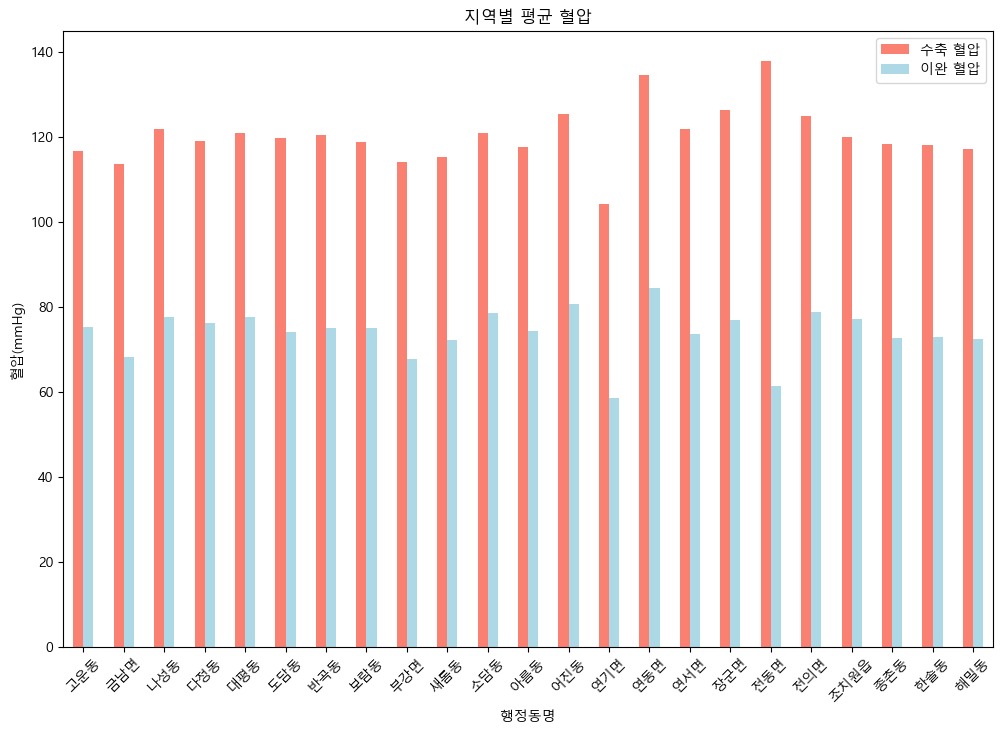

In [42]:
# 지역별 수축기 및 이완기 혈압의 평균 구하기
region_group = df_blood.groupby('행정동명')[['수축 혈압', '이완 혈압']].mean()
print(region_group)

# 지역별 수축기 및 이완기 혈압 시각화
region_group.plot(kind='bar', figsize=(12, 8), color=['salmon', 'lightblue'],rot=(45))
plt.title('지역별 평균 혈압')
plt.xlabel('행정동명')
plt.ylabel('혈압(mmHg)')
plt.show()


### 나이 구간별 고혈압 비율 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_4352\2098265942.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_high_bp = df_blood[high_bp].groupby('나이 구간').size() / df_blood.groupby('나이 구간').size()
C:\Users\user\AppData\Local\Temp\ipykernel_4352\2098265942.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_high_bp = df_blood[high_bp].groupby('나이 구간').size() / df_blood.groupby('나이 구간').size()


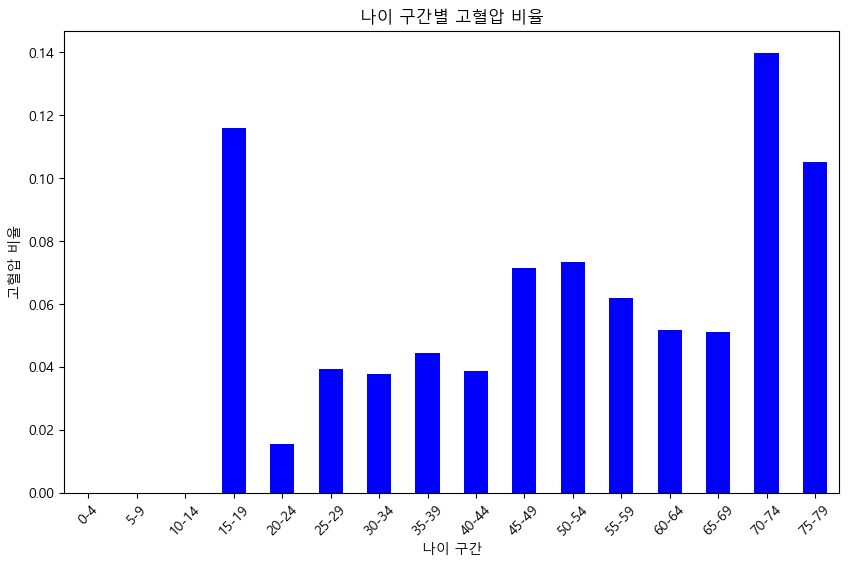

In [44]:
# 고혈압 기준 정의
high_bp = (df_blood['수축 혈압'] >= 140) | (df_blood['이완 혈압'] >= 90)

# 나이를 5살 간격으로 나누는 구간 설정
bins = range(0, df_blood['나이'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# '나이 구간' 열 생성
df_blood['나이 구간'] = pd.cut(df_blood['나이'], bins=bins, labels=labels, right=False)

# 나이 구간별 고혈압 비율 계산
age_group_high_bp = df_blood[high_bp].groupby('나이 구간').size() / df_blood.groupby('나이 구간').size()

# 나이 구간별 고혈압 비율 시각화
plt.figure(figsize=(10, 6))
age_group_high_bp.plot(kind='bar', color='blue')
plt.title('나이 구간별 고혈압 비율')
plt.xlabel('나이 구간')
plt.ylabel('고혈압 비율')
plt.xticks(rotation=45)
plt.show()


### 성별에 따른 혈압 평균 시각화

         수축 혈압      이완 혈압
성별                       
F   116.223228  72.987699
M   121.118262  76.898266


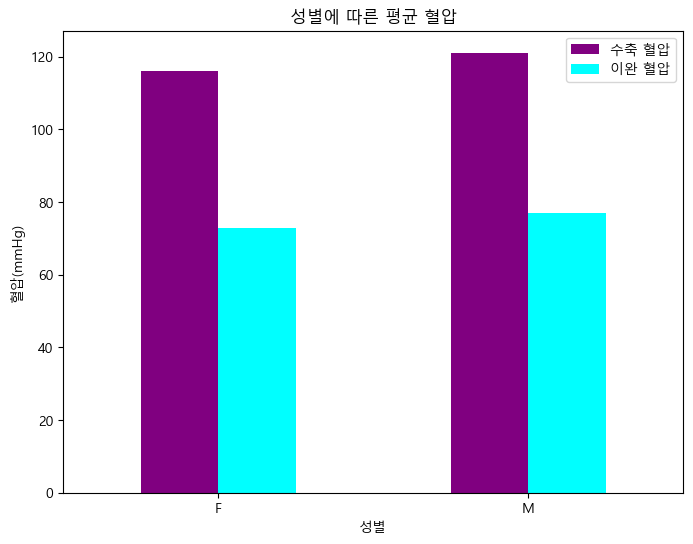

In [122]:
# 성별에 따른 수축기 및 이완기 혈압의 평균 구하기
gender_group = df_blood.groupby('성별')[['수축 혈압', '이완 혈압']].mean()
print(gender_group)

# 성별에 따른 혈압 분포 시각화
gender_group.plot(kind='bar', figsize=(8, 6), color=['purple', 'cyan'], rot=0)
plt.title('성별에 따른 평균 혈압')
plt.xlabel('성별')
plt.ylabel('혈압(mmHg)')
plt.show()


### 세종시 혈압 이상치 동별 분포 확인

In [140]:
# 데이터 불러오기
outlier_data = pd.read_csv('./data/세종특별자치시_혈압 이상치_데이터.csv')
population_data = pd.read_excel('./data/2024년_7월_말_기준_인구현황.xlsx')

# 데이터 확인
print("Outlier Data")
print(outlier_data.head())

print("\nPopulation Data")
print(population_data.head())


Outlier Data
                           사용자 고유번호        측정일자   측정시간 성별  사용자 출생년도 행정동명  \
0  CAD71E638BAC342BE0535F00A8C05272  2021-08-31  16:48  M      1980  한솔동   
1  CAD72451510337B6E0535F00A8C02A56  2021-08-31  17:00  M      1952  한솔동   
2  CAEEA89380A90716E0535F00A8C0F342  2021-09-01  20:58  F      1957  한솔동   
3  CAFCD67A8E9F55EAE0535F00A8C04C8B  2021-09-02  14:19  F      1990  고운동   
4  CA4C04225E405C30E0535F00A8C03ECD  2021-09-02  18:44  F      1995  다정동   

   수축 혈압  이완 혈압    맥박  측정연도  나이  
0    157     96  65.0  2021  43  
1    139     68  55.0  2021  71  
2    136     64  61.0  2021  66  
3     80     48  88.0  2021  33  
4    158     88  91.0  2021  28  

Population Data
   행정동명    구분    전체인구  지역별전체인구비율    내국인계  지역별내국인비율  전월대비증감      남자     남자구성비  \
0    총합     계  394630   1.000000  388788  1.000000     848  193538  0.497798   
1  조치원읍  조치원읍   42154   0.106819   40498  0.104165     -30   21036  0.054107   
2   연기면   연기면    2500   0.006335    2409  0.006196      -5    1384  0

### 세종시 혈압 이상치 동별 분포 비율 비교 시각화

    행정동명  이상치 빈도   전체인구  이상치 비율 (%)
0    한솔동    1287  18143    7.093645
1    새롬동    1031  26479    3.893652
2    아름동     736  23383    3.147586
3    반곡동     499  28923    1.725271
4    고운동     458  35964    1.273496
5    다정동     452  28312    1.596496
6    도담동     400  24976    1.601537
7    종촌동     396  27879    1.420424
8    해밀동     352  16612    2.118950
9    나성동     276  13176    2.094718
10   보람동     209  18924    1.104418
11   어진동     177  11278    1.569427
12  조치원읍     175  42154    0.415144
13   연기면     163   2500    6.520000
14   소담동     155  21772    0.711924
15   대평동     146  11293    1.292836
16   장군면      66   7032    0.938567
17   금남면       7   8581    0.081576
18   부강면       6   5755    0.104257
19   전의면       5   5694    0.087812
20   연서면       4   7045    0.056778
21   연동면       3   2978    0.100739
22   전동면       1   3421    0.029231


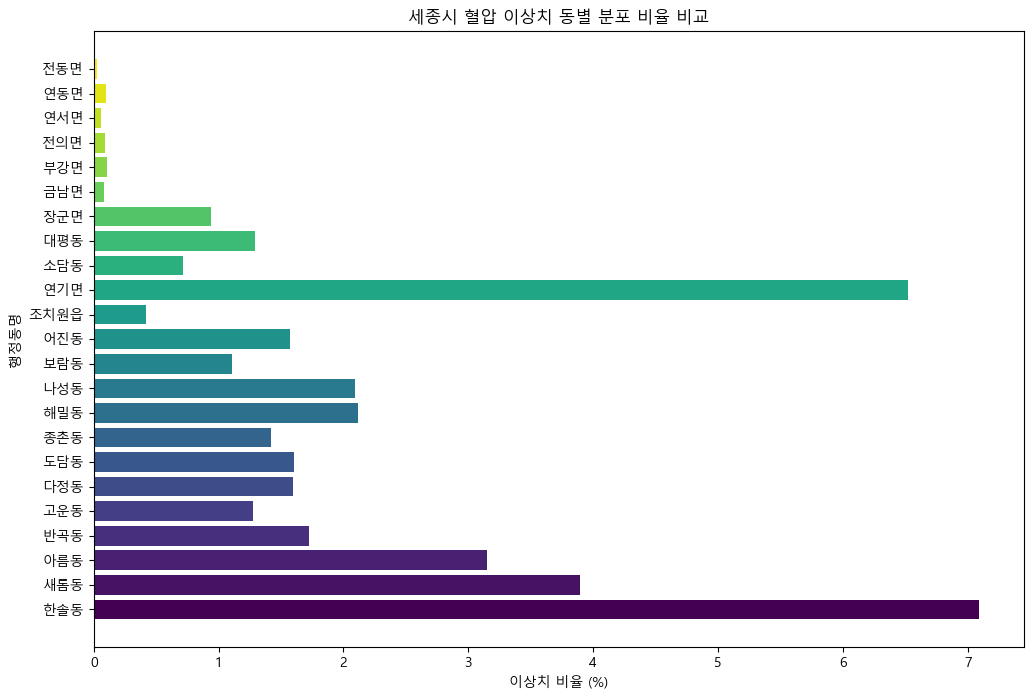

In [143]:
# 이상치 데이터에서 행정동별 빈도 계산
outlier_counts = outlier_data['행정동명'].value_counts().reset_index()
outlier_counts.columns = ['행정동명', '이상치 빈도']

# 인구 데이터에서 행정동명별 인구 데이터만 추출
population_summary = population_data[['행정동명', '전체인구']].copy()

# 이상치 빈도와 인구 데이터 병합
comparison_data = pd.merge(outlier_counts, population_summary, on='행정동명', how='left')

# 이상치 빈도를 인구 대비 백분율 계산
comparison_data['이상치 비율 (%)'] = (comparison_data['이상치 빈도'] / comparison_data['전체인구']) * 100

# 결과 확인
print(comparison_data)

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(comparison_data['행정동명'], comparison_data['이상치 비율 (%)'],color=plt.cm.viridis(np.linspace(0, 1, len(comparison_data))))
plt.xlabel('이상치 비율 (%)')
plt.ylabel('행정동명')
plt.title('세종시 혈압 이상치 동별 분포 비율 비교')
plt.show()


### 세종시 행정동별 남성과 여성 인구 비교

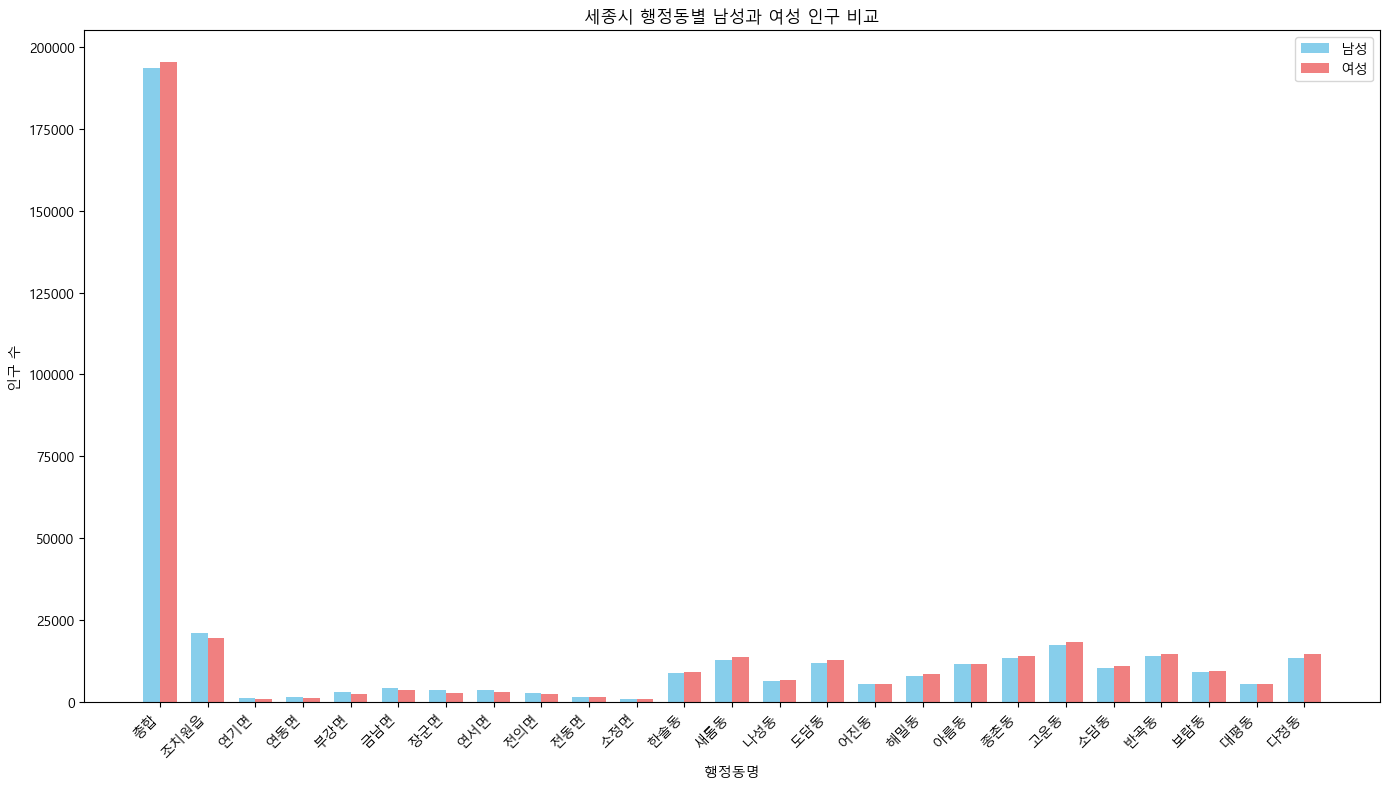

In [146]:
# 필요한 데이터만 추출
gender_data = population_data[['행정동명', '남자', '여자']].copy()

# 막대의 위치 설정
x = np.arange(len(gender_data))  # 행정동별 위치
width = 0.35  # 막대의 너비

# 시각화
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x - width/2, gender_data['남자'], width, label='남성', color='skyblue')
bars2 = ax.bar(x + width/2, gender_data['여자'], width, label='여성', color='lightcoral')

# 레이블 및 제목 설정
ax.set_xlabel('행정동명')
ax.set_ylabel('인구 수')
ax.set_title('세종시 행정동별 남성과 여성 인구 비교')
ax.set_xticks(x)
ax.set_xticklabels(gender_data['행정동명'], rotation=45, ha="right")
ax.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()


## 중증 고혈압(수축기) 질환의 기준 정의와 출처

#### 고혈압의 정의:
###### -정상 혈압: 수축기 혈압 < 120mmHg, 이완기 혈압 < 80mmHg
###### -고혈압 전단계: 수축기 혈압 120-139mmHg 또는 이완기 혈압 80-89mmHg
###### -1기 고혈압: 수축기 혈압 140-159mmHg 또는 이완기 혈압 90-99mmHg
###### -2기 고혈압 (중증 고혈압): 수축기 혈압 ≥ 160mmHg 또는 이완기 혈압 ≥ 100mmHg
####   -중증 질환의 기준: 수축기 혈압이 160mmHg 이상이거나 이완기 혈압이 100mmHg 이상일 때
####     중증 고혈압으로 분류되며, 이는 즉각적인 치료가 필요한 상태입니다.

##### 출처:
###### 대한고혈압학회 (Korean Society of Hypertension) 고혈압 진단 기준
###### American College of Cardiology/American Heart Association (ACC/AHA) 2017 Hypertension Guidelines


### 세종시 행정동별 중증 고혈압 대상자수 시작화

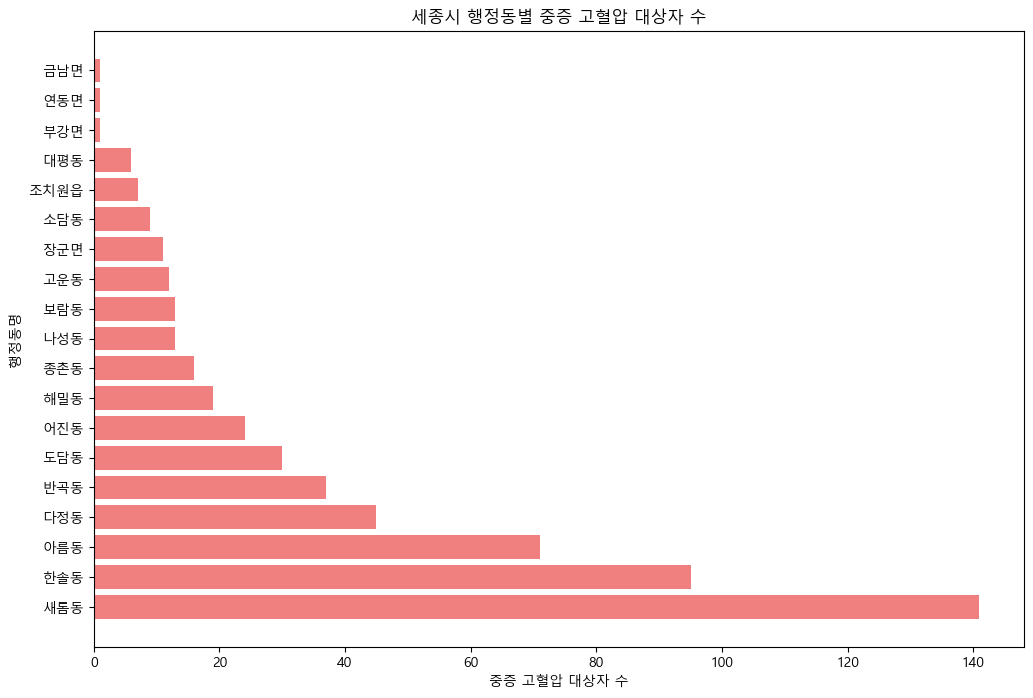

In [150]:
# 데이터 불러오기
bp_data = pd.read_csv('./data/세종특별자치시_혈압 이상치_데이터.csv', encoding='utf-8')

# 중증 고혈압 기준 적용 (수축기 ≥ 160mmHg 또는 이완기 ≥ 100mmHg)
severe = bp_data[(bp_data['수축 혈압'] >= 160) | (bp_data['이완 혈압'] >= 100)]

# 행정동별 중증 고혈압 대상자 수 집계
severe_counts = severe['행정동명'].value_counts().reset_index()
severe_counts.columns = ['행정동명', '중증 고혈압 대상자 수']

# 결과 시각화
plt.figure(figsize=(12, 8))
plt.barh(severe_counts['행정동명'], severe_counts['중증 고혈압 대상자 수'], color='lightcoral')
plt.xlabel('중증 고혈압 대상자 수')
plt.ylabel('행정동명')
plt.title('세종시 행정동별 중증 고혈압 대상자 수')
plt.show()


#### '세종시 혈압 이상치 동별 분포 비율 비교'와 '세종시 행정동별 중증 고혈압 대상자 수' 사이에 차이가 나타나는 이유는 비율과 절대 수치의 차이 때문임
###### 이상치 비율: 특정 행정동에서 발견된 혈압 이상치의 수를 해당 행정동의 전체 인구수로 나누어 계산됩니다. 이 지표는 인구 수와 비교했을 때 얼마나 많은 이상치가 발생했는지를 보여줍니다.
###### 중증 고혈압 대상자 수: 이는 해당 행정동에서 중증 고혈압으로 분류된 사람들의 절대 수치입니다.
###### 따라서, 인구 대비 이상치 비율은 인구가 적은 지역에서 중증 고혈압 대상자의 수가 적더라도 비율적으로는 높게 나타날 수 있습니다. 반대로, 인구가 많은 지역에서는 중증 고혈압 대상자 수가 많아도, 비율적으로는 상대적으로 낮게 나타날 수 있습니다.

## 여기까지가 혈압 관련 내용입니다.

In [ ]:
#2. CVS파일을 로드하여 DataFrame생성 
#2-2-1 `23년도 국민겅간보험공단 건강검진정보 파일 로드
base_health = pd.read_csv('data/국민건강보험공단_건강검진정보_2023.CSV', encoding='cp949')
df_health = base_health.copy()
df_health.info(1)

In [ ]:
## 1단계 데이터셋 구성 파악 할것
##  - 종속/독립 변수의 파악, 데이터행 및 타입, Na컬럼 갯수 파악 : info() , shpae
##  - 데이터 형태 파악 : head(5)
##  - 테이터 분포 파악 : describe() , 시각화 boxplot(), .plot.hist() , (.value_counts(), .plot.bar())

In [ ]:
df_health.info()

In [ ]:
df_health.shape

In [ ]:
df_health.head(1)

In [ ]:
df_health.describe()

In [ ]:
# '신장', '체중' 컬럼에 대한 박스플롯 생성
plt.figure(figsize=(10, 6))
df_health.boxplot(column=['신장(5cm단위)', '체중(5kg단위)'])
plt.title('신장과 체중 Boxplot')
plt.show()


In [ ]:
# '나이', '혈압' 컬럼에 대한 히스토그램 생성
plt.figure(figsize=(10, 6))
df_health['연령대코드(5세단위)'].plot.hist(bins=20, alpha=0.7)
plt.title('나이 히스토그램')
plt.xlabel('나이')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#  '흡연 여부' 컬럼에 대한 빈도수 시각화
plt.figure(figsize=(10, 6))
df_health['흡연상태'].value_counts().plot.bar(color='purple', rot=(0))
plt.title('흡연상태분포')
plt.xlabel('흡연상태')
plt.ylabel('빈도수')
plt.show()

In [ ]:
#2. CVS파일을 로드하여 DataFrame생성 
#2-2-2 2024년_7월_말_기준_인구현황(세종) 파일 로드 (엑셀파일)
base_population = pd.read_excel(io='data/2024년_7월_말_기준_인구현황.xlsx', sheet_name='인구')
df_population = base_population.copy()
df_population.info()
df_population.head(1)

In [ ]:
df_population.shape

In [ ]:
df_population.head(5)

In [ ]:
#2. CVS파일을 로드하여 DataFrame생성 
#2-2-4 세종특별시 우편번호 파일 로드
base_zip = pd.read_csv('data/세종특별자치시_우편번호.csv')
df_zip = base_zip.copy()
df_zip.info()
df_zip.head(1)

## 전처리 작업으로 완료된 데이터셋 파일은 df대신 adf 로 적용하고 기본 데이터프레임으로 사용할것임

# 3. 전처리 필요한 주요 데이터셋 분석 수행

## 3-1. 세종특별자치시_신장 체중 등록 내역 

## 3-2. 세종특별자치시_인바디 측정 내역

## 3-3. 세종특별자치시_스트레스 측정 내역

## 3-4. 세종특별자치시_혈압 측정 내역

# 4. 분석데이터셋 전처리 수행

## 4-5. 통합측정자료(공통) DataFrame생성작업

In [ ]:
## 임시적용 부분 추후 삭제 할것  start
adf_wh = df_wh.copy()
adf_inbody = df_inbody.copy()
adf_stress = df_stress.copy()
adf_blood = df_blood.copy()

adf_wh['나이']     = 2023 - adf_wh['사용자 출생년도'] +1 
adf_inbody['나이'] = 2023 - adf_inbody['사용자 출생년도'] +1 
adf_stress['나이'] = 2023 - adf_stress['사용자 출생년도'] +1 
adf_blood['나이']  = 2023 - adf_blood['사용자 출생년도'] +1 

#tmp_hw = adf_wh[['사용자 고유번호', '측정일자', '측정시간', '성별', '사용자 출생년도', '행정동명', '나이']]
#tmp_hw
## 임시적용 부분 추후 삭제 할것  end

## 작업내역 : 작업 4개 DataFrame 별 구분(wh, inbody, stress, blood)값 입력한 필요 데이터 부분 검색 후 df.concat()으로 합치기
## 1. 구분값 적용
adf_wh['구분'] = 'wh'
adf_inbody['구분'] = 'inbody'
adf_stress['구분'] = 'stress'
adf_blood['구분'] = 'blood'

## 각 데이터셋에서 해당 필드만 골라 세로로 합치기 수행
base_check = pd.concat([ adf_wh[['구분', '사용자 고유번호', '측정일자', '측정시간', '성별', '사용자 출생년도', '행정동명', '나이']],
                         adf_inbody[['구분','사용자 고유번호', '측정일자', '측정시간', '성별', '사용자 출생년도', '행정동명', '나이']],
                         adf_stress[['구분','사용자 고유번호', '측정일자', '측정시간', '성별', '사용자 출생년도', '행정동명', '나이']],
                         adf_blood[['구분','사용자 고유번호', '측정일자', '측정시간', '성별', '사용자 출생년도', '행정동명', '나이']]
                       ]).reset_index()

base_check.info()

In [ ]:
base_check.tail()

In [ ]:
## 2. 측정일자/측정시간  Object Type를 data Type변환 
base_check['측정일자'] = pd.to_datetime(base_check['측정일자'])
base_check.info()

In [ ]:
base_check.head()

In [ ]:
## 추가 컬럼 년도, 요일 , 분기 등등...
# 측정연도 변수 추가 (년도)
base_check['측정연도'] = base_check['측정일자'].dt.year
# 측정요일 변수 추가 (요일) : ### 요일값 0:월 1:화.....6:일 입니다.
#base_check['측정요일'] = base_check['측정일자'].dt.weekday
base_check['측정요일'] = base_check['측정일자'].dt.day_name()

## 측정요일 갖고 주말(토.일) 평일 구분
base_check['휴일구분'] = np.where(base_check['측정일자'].dt.weekday>= 5, '주말','평일')

## 나이대역 구분
base_check['나이구분'] = (base_check['나이']//10)*10

## 측정시간 변수 추가 
base_check['방문시간'] = base_check['측정시간'].str.split(':').str.get(0)


base_check

In [ ]:
## 연도별 데이터 확인
base_check['측정연도'].value_counts()

In [ ]:
## 2021년도 이상만 구성 전처리 적용
base_check=base_check.query('측정연도 >= 2021')
base_check=base_check.query('측정연도 <  2024')
base_check.info()

# 5. DataFrame 분석 수행

## 5-5.  "통합측정자료(공통)" 통해 똑똑건강 이용 실태 현황 분석 수행

In [ ]:
## 복사본 생성
adf_check = base_check.copy()

In [ ]:
## 똑똑건강 전체 이용 형태 분석 ##
adf_check.head(5)

In [ ]:
adf_check['나이'].value_counts()

In [ ]:
sns.histplot(data=adf_check, x='나이')

In [ ]:
adf_check.describe()

In [ ]:
adf_check['나이구분'].value_counts()

In [ ]:
plt.title('똑똑건강 이용자 나이별 건강측정 현황', fontsize=14)
plt.xlabel('나이', fontsize=10)
plt.xticks(rotation=0, fontsize=8)

#sns.set_palette('hls')
ax = sns.countplot(data = adf_check, x ='나이구분', palette="hls")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 7)
    
plt.show()

In [ ]:
adf_check['행정동명'].value_counts()

In [ ]:
plt.title('똑똑건강 이용자 전체 건강측정 현황', fontsize=14)
plt.xlabel('행정동명', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='행정동명', palette="hls", order = adf_check['행정동명'].value_counts().index)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.title('똑똑건강 이용자 전체 건강측정 현황', fontsize=14)
plt.xlabel('행정동-측정기기별', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='행정동명', hue='구분', palette="hls", order = adf_check['행정동명'].value_counts().index)
plt.show()

In [ ]:
adf_check['구분'].value_counts()

In [ ]:
sns.countplot(data = adf_check, x ='구분')

In [ ]:
plt.title('똑똑건강 이용자 전체 측정기기 현황', fontsize=14)
plt.xlabel('측정기기별', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='구분', hue='성별', palette="hls")
plt.show()

In [ ]:
adf_check['성별'].value_counts()

In [ ]:
sns.countplot(data = adf_check, x ='성별')

In [ ]:
plt.title('똑똑건강 이용자 전체 성별 현황', fontsize=14)
plt.xlabel('측정기기별', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='구분', hue='성별', palette="hls")
plt.show()

In [ ]:
adf_check['측정연도'].value_counts()

In [ ]:
plt.title('똑똑건강 이용자 전체 건강측정 현황', fontsize=14)
plt.xlabel('측정연도별', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='측정연도',  palette="hls", legend=True)
plt.show()

In [ ]:
plt.title('똑똑건강 이용 측정연도별-측정기기 현황', fontsize=14)
plt.xlabel('측정연도별-측정기기', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='측정연도',  hue='구분',  palette="hls")
plt.show()

In [ ]:
plt.title('똑똑건강 이용 측정연도-성별 현황', fontsize=14)
plt.xlabel('측정연도-성별', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check, x ='측정연도',  hue='성별',  palette="hls")
plt.show()

In [ ]:
adf_check['측정연도'].value_counts()

In [ ]:
adf_check_son_use01 = adf_check.groupby(['사용자 고유번호','성별','행정동명','나이'], as_index = False) \
                               .agg(cnt = ('사용자 고유번호', 'count'))
adf_check_son_use01

In [ ]:
adf_check_son_use01.describe()

In [ ]:
adf_check_son_use01.info()

In [ ]:
sns.countplot(data = adf_check_son_use01, x ='나이')

In [ ]:
plt.title('똑똑건강 실제 이용자 건강측정 현황', fontsize=14)
plt.xlabel('행정동', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check_son_use01, x ='행정동명',  palette="hls", order = adf_check['행정동명'].value_counts().index)
plt.show()

In [ ]:
plt.title('똑똑건강 실제 이용자 건강측정 현황', fontsize=14)
plt.xlabel('행정동', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.countplot(data = adf_check_son_use01, x ='행정동명', hue='성별',  palette="hls", order = adf_check['행정동명'].value_counts().index)
plt.show()

In [ ]:
## 이용자 행정동명별 집계 count
adf_check_son_use02 = adf_check_son_use01.groupby(['행정동명'], as_index = False) \
                               .agg(cnt = ('사용자 고유번호', 'count'))
adf_check_son_use02 

In [ ]:
## Join으로 세종인구 와 "adf_check_son_use01" 합치기
adf_check_son_use03 = adf_check_son_use02.merge(df_population, how='left', on='행정동명')
adf_check_son_use03.info()

In [ ]:
# 똑똑건강 이융자 - 동별 퍼센트
adf_check_son_use03['똑똑비율'] = adf_check_son_use03['cnt'] / adf_check_son_use03['전체인구'] * 100
adf_check_son_use03[['행정동명', 'cnt', '전체인구', '똑똑비율']]

In [ ]:
sum(adf_check_son_use03['cnt'])/ sum(adf_check_son_use03['전체인구'])*100

In [ ]:
plt.title('똑똑건강 인구별 이용 비율 현황', fontsize=14)
plt.xlabel('행정동', fontsize=10)
plt.ylabel('인구', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')

ax = sns.barplot(data = adf_check_son_use03, x ='행정동명',  y = '전체인구',  palette="hls", order = adf_check['행정동명'].value_counts().index)

ax2 = ax.twinx()
sns.pointplot(data = adf_check_son_use03, x ='행정동명',  y = 'cnt',   order = adf_check['행정동명'].value_counts().index, ax=ax2).set(ylim=[0,5000])

plt.show()


In [ ]:
plt.title('똑똑건강 인구별 이용 비율 현황', fontsize=14)
plt.xlabel('행정동', fontsize=10)
plt.ylabel('이용비율', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#sns.set_palette('hls')
sns.barplot(data = adf_check_son_use03, x ='행정동명',  y = '똑똑비율',  palette="hls", order = adf_check['행정동명'].value_counts().index)

#plt.hlines(y=1.846286394850873, xmin=0, xmax=len(adf_check_son_use03)+1, color='red', linestyle='dotted')
plt.hlines(y=sum(adf_check_son_use03['cnt'])/ sum(adf_check_son_use03['전체인구'])*100, xmin=0, xmax=len(adf_check_son_use03)-1, color='red', linestyle='dotted')
plt.show()

In [ ]:
## 이용자 행정동명별 집계 count
adf_check_son_use04 = adf_check_son_use01.groupby(['나이'], as_index = False) \
                               .agg(cnt = ('사용자 고유번호', 'count'))
adf_check_son_use04['나이구분'] = (adf_check_son_use04['나이']//10)*10
adf_check_son_use04

In [ ]:
sns.lineplot(data = adf_check_son_use04, x = '나이구분', y = 'cnt')
